In [1]:
# turn jedi off for fast tab completion
%config Completer.use_jedi = False

## Unsupervised Learning

In [2]:
from sklearn import *
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
data = load_iris()
X = data.data
X = X[:,:2]
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X)

array([0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 4, 1, 1, 3, 1, 3, 1, 2, 1, 2, 2, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 1, 3, 2, 3, 3, 3, 1, 2, 3, 1, 3, 4, 1, 1, 4, 2, 4, 1, 4,
       1, 1, 1, 3, 3, 1, 1, 4, 4, 3, 1, 3, 4, 1, 1, 4, 1, 1, 1, 4, 4, 4,
       1, 1, 3, 4, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3])

In [4]:
kmeans.cluster_centers_

array([[5.22068966, 3.66551724],
       [6.50487805, 3.03414634],
       [4.77777778, 2.94444444],
       [5.8175    , 2.6925    ],
       [7.43846154, 3.13076923]])

In [5]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

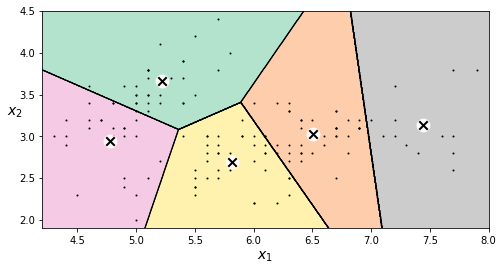

In [6]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [7]:
kmeans.transform(X_new)

array([[ 5.47992228,  6.58656945,  4.87022954,  5.85857171,  7.52391847],
       [ 2.77586207,  3.65426173,  2.01307455,  2.90135529,  4.58023797],
       [ 8.24758459,  9.50493938,  7.77797619,  8.82286022, 10.43928062],
       [ 8.30290123,  9.51987495,  7.79046584,  8.81960104, 10.45750205]])

### Centroid initialization

In [8]:
good_init = np.array([[-3,3], [-3,2], [-3,1], [-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init = good_init, n_init = 1)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

In [9]:
kmeans.inertia_

26.996265338567866

In [10]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters = 5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

### Choosing number of clusters

In [11]:
from sklearn.metrics import silhouette_score
# per n_cluster, higher better
silhouette_score(X,kmeans.labels_)

0.42035811301772896

### Clustering for image segmentation

#### Color Segmentation

In [12]:
from matplotlib.image import imread
image = imread("images/unsupervised_learning/ladybug.png")

In [13]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

In [14]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

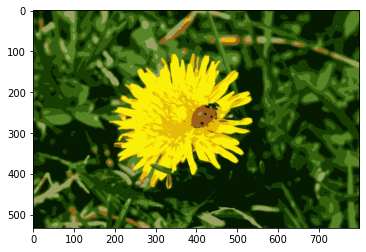

In [15]:
plt.imshow(segmented_img)

### Clustering for dimensionality reduction

In [16]:
from sklearn.datasets import load_digits
X_digits,y_digits = load_digits(return_X_y=True)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_digits,y_digits, )

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [19]:
# Baseline
log_reg.score(X_test,y_test)

0.9577777777777777

In [20]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans",KMeans(n_clusters = 99)),
    ("log_reg",LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=99)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [21]:
pipeline.score(X_test,y_test)

0.9888888888888889

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters = range(2,100))
grid_clf = GridSearchCV(pipeline,param_grid, cv = 3, verbose = 2)
grid_clf.fit(X_train,y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=5 ............................................
[CV] .

[CV] ............................ kmeans__n_clusters=22, total=   4.9s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   4.6s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   4.8s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   5.0s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   4.6s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   4.7s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   5.7s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

KeyboardInterrupt: 

In [ ]:
grid_clf.best_estimator_.score(X_test,y_test)

### Semi Supervised Learning

In [ ]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

In [ ]:
log_reg.score(X_test,y_test)

In [ ]:
k = 50
kmeans = KMeans(n_clusters =k, random_state = 42)
X_digits_dist = kmeans.fit_transform(X_train)
rep_digits_idx = np.argmin(X_digits_dist,axis = 0)
X_rep_digits = X_train[rep_digits_idx]

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_rep_digit in enumerate(X_rep_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_rep_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [ ]:
y_train[rep_digits_idx]

In [ ]:
### Label the data manually
y_rep =  np.array([3, 4, 8, 9, 5, 6, 2, 7, 0, 6, 1, 8, 2, 4, 1, 7, 8, 5, 7, 5, 6, 0,
       5, 1, 2, 1, 6, 6, 7, 8, 9, 9, 4, 1, 1, 3, 8, 2, 8, 6, 4, 1, 4, 2,
       5, 3, 7, 1, 9, 0])

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_rep_digits,y_rep)

In [ ]:
log_reg.score(X_test,y_test)

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_rep[i]
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train,y_train_propagated)
log_reg.score(X_test,y_test)

 ### DBSCAN

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples= 1000, noise = 0.05)
dbscan = DBSCAN( eps = 0.2, min_samples = 5)
dbscan.fit(X)
X.shape

(1000, 2)

In [ ]:
len(dbscan.core_sample_indices_)

In [ ]:
dbscan.components_


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

In [ ]:
X_new = np.array([[-0.5,0],[0,0.5], [1,-0.1], [2,1]])
knn.predict(X_new)

In [ ]:
y_dist,y_pred_idx = knn.kneighbors(X_new,n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2 ] = -1

In [ ]:
y_pred.ravel()

### Gaussian Mixtures

In [28]:
from sklearn.mixture import GaussianMixture
print(X.shape)
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

(1000, 2)


GaussianMixture(n_components=3, n_init=10)

In [29]:
gm.weights_

array([0.60006208, 0.1989571 , 0.20098083])

In [30]:
gm.covariances_

array([[[ 0.17665363, -0.11016015],
        [-0.11016015,  0.29290203]],

       [[ 0.05043467,  0.05958243],
        [ 0.05958243,  0.08606857]],

       [[ 0.05021675,  0.06002728],
        [ 0.06002728,  0.08654587]]])

In [31]:
gm.means_


array([[ 0.50623962,  0.24827401],
       [ 1.7581871 , -0.05037931],
       [-0.75133619,  0.5481193 ]])

In [40]:
X_new, y_new = gm.sample(6)
y_new

array([0, 0, 0, 0, 1, 1])

In [41]:
from matplotlib.colors import LogNorm
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

c:\users\carlos sandoval\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Log scale: values of z <= 0 have been masked
  del sys.path[0]
c:\users\carlos sandoval\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Log scale: values of z <= 0 have been masked


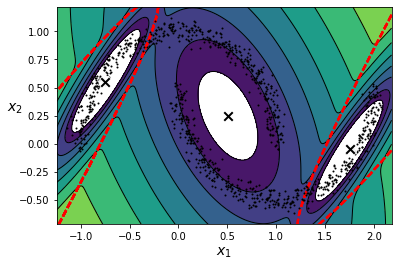

In [42]:
plot_gaussian_mixture(gm,X)

In [49]:
densities = gm.score_samples(X)
densities_under_thresh = np.percentile(densities, 4)
anomalies = X[densities < densities_under_thresh]

c:\users\carlos sandoval\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Log scale: values of z <= 0 have been masked
  del sys.path[0]
c:\users\carlos sandoval\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Log scale: values of z <= 0 have been masked


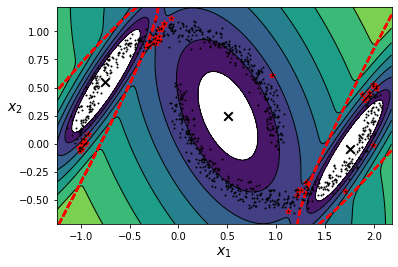

In [51]:
plot_gaussian_mixture(gm,X)
plt.scatter(anomalies[:,0],anomalies[:,1],color = "r", marker = "*" )

## Exercises

### Grouping instances in the dataset according to nonexistent labels
* Kmeans
* DBSCAN
* GaussianMixtures

### Unsupervised Learning, Anomaly Detection

### Silhouette Score, ELBO 

### Manually labelling a few instances, and propagating the labels to instances in the same cluster. 
### We do this to create labels for our data even though the dataset is unlabeled

### BIRCH, Kmeans, DBSCAN and Mean-Shift look for high density 

### Large dataset of few images but not labeled

### In one, the dataset is assumed to be clean

### Gaussian mixture is a set of unkown distributions, we can estimate these distributions to cluster our data

### AIC,BIC, Bayesian mixture model

In [137]:
import sklearn
faces = sklearn.datasets.fetch_olivetti_faces()
X = faces.data
y = faces.target
#sss = sklearn.model_selection.StratifiedShuffleSplit(n_splits=10, test_size=0.2)
#sss.get_n_splits(X,y)
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2)

In [138]:
sample_img = X_train[:4,:] 

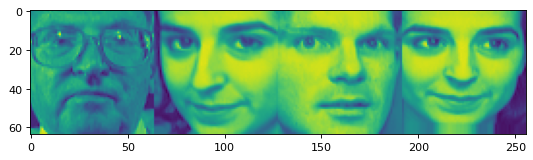

In [175]:
from matplotlib.pyplot import figure
def plot_faces(data, mask):
    masked_data = data[mask]
    base = masked_data.shape[0]//10
    off = 1 if masked_data.shape[0]%10 else 0
    start = 0
    for i in range(1,base+off+1):
        figure(figsize=(8, 6), dpi=80)
        row_data = masked_data[start:i*10]
        start+=10
        plt.imshow(np.concatenate(row_data.reshape(-1,64,64),axis = 1))
        plt.show()

plot_faces(sample_img, [True,True,True,True])

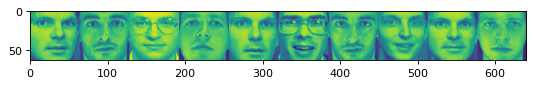

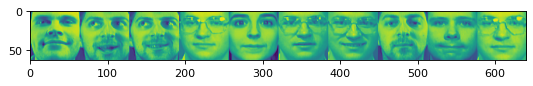

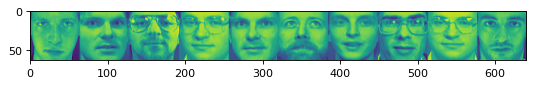

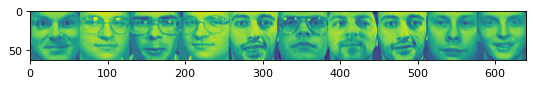

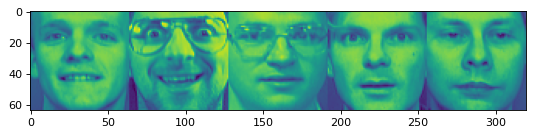

In [140]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_train)
pred_indices = y_pred == 2
plot_faces(X_train, pred_indices)

In [172]:
svc_clf = sklearn.svm.SVC(C=40)
svc_clf.fit(X_train,y_train)
preds = svc_clf.predict(X_test)
score = sklearn.metrics.accuracy_score(preds,y_test)
print(score)

0.9625


In [166]:
pipeline = Pipeline([
    ("kmeans",KMeans(n_clusters = 10)),
    ("svm_clf",sklearn.svm.SVC(C=10))
])

In [167]:
pipeline.fit(X_train, y_train)
pipeline.score(X_test,y_test)

0.5875

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters = range(2,100))
grid_clf = GridSearchCV(pipeline,param_grid, cv = 3, verbose = 2)
grid_clf.fit(X_train,y_train)

In [179]:
from sklearn.decomposition import PCA
pca =  PCA(n_components =0.99)
X_train_reduced = pca.fit_transform(X_train)
X_train_reduced.shape

(320, 218)

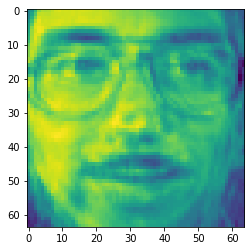

In [194]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X_train_reduced)
sample = gm.sample()
sample = (sample[0])
reco_sample = pca.inverse_transform(sample)
plt.imshow(reco_sample[0].reshape(64,64))